In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xml.etree.ElementTree as ET

import os

import datetime

%matplotlib inline

In [7]:
configs = {
    'peloton_file': 'cheenbeen_workouts.csv',
    'apple_file': 'export.xml'
}

In [6]:
peloton_path = './data/peloton'
apple_path = "./data/apple_health_export"

In [66]:
df_peloton = pd.read_csv(os.path.join(peloton_path, configs['peloton_file']))

In [9]:
df_peloton.head()

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Class Timestamp,Total Output,Avg. Watts,Avg. Resistance,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Calories Burned,Avg. Heartrate,Avg. Incline,Avg. Pace (min/mi)
0,2022-03-07 17:41 (CDT),On Demand,Becs Gentry,30,Running,Endurance,30 min 5K Race Prep,2019-07-11 11:34 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,174,NaN,NaN,NaN
1,2022-03-08 17:53 (CDT),On Demand,Callie Gullickson,30,Cardio,HIIT,30 min HIIT Cardio,2022-02-23 08:50 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,166,NaN,NaN,NaN
2,2022-03-10 09:13 (CDT),On Demand,Rebecca Kennedy,45,Strength,Full Body,45 min Full Body Strength,2022-01-28 08:51 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,228,NaN,NaN,NaN
3,2022-03-11 15:34 (CDT),On Demand,Becs Gentry,30,Running,Intervals,30 min Intervals Run,2020-01-31 08:54 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,253,NaN,NaN,NaN
4,2022-03-12 16:56 (CDT),On Demand,Rebecca Kennedy,45,Strength,Full Body,45 min Full Body Strength,2022-01-28 08:51 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,210,NaN,NaN,NaN


## My Favorite Instructors

In [13]:
df_peloton['Instructor Name'].value_counts().values

array([29, 19, 10,  9,  5,  2,  1,  1,  1,  1,  1,  1,  1])

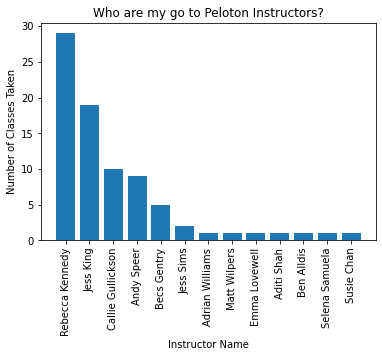

In [18]:
plt.bar(df_peloton['Instructor Name'].value_counts().keys(),
       df_peloton['Instructor Name'].value_counts().values)
plt.xlabel("Instructor Name")
plt.ylabel("Number of Classes Taken")
plt.title("Who are my go to Peloton Instructors?")
plt.xticks(rotation=90);

## What kinda classes did I take?

In [19]:
df_peloton['Fitness Discipline'].value_counts()

Strength      39
Running       29
Cardio         5
Stretching     4
Walking        3
Yoga           1
Name: Fitness Discipline, dtype: int64

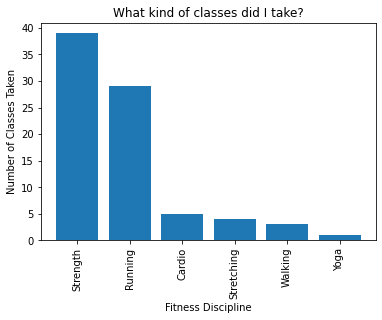

In [21]:
plt.bar(df_peloton['Fitness Discipline'].value_counts().keys(),
       df_peloton['Fitness Discipline'].value_counts().values)
plt.xlabel("Fitness Discipline")
plt.ylabel("Number of Classes Taken")
plt.title("What kind of classes did I take?")
plt.xticks(rotation=90);

## I forget to stretch!!

## Diving Deeper
Since running and strength were my top 2, let's see what type of running and strength classes I did!

In [22]:
df_running = df_peloton[df_peloton['Fitness Discipline'] == 'Running']

In [24]:
df_running['Type'].value_counts()

Intervals    21
Endurance     4
Music         3
Theme         1
Name: Type, dtype: int64

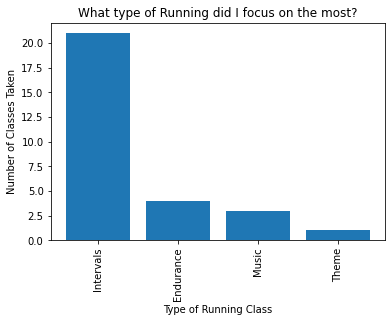

In [26]:
plt.bar(df_running['Type'].value_counts().keys(),
       df_running['Type'].value_counts().values)
plt.xlabel("Type of Running Class")
plt.ylabel("Number of Classes Taken")
plt.title("What type of Running did I focus on the most?")
plt.xticks(rotation=90);

In [27]:
df_strength = df_peloton[df_peloton['Fitness Discipline'] == 'Strength']

In [28]:
df_strength['Type'].value_counts()

Full Body               14
Core                    11
Lower Body               7
Upper Body               6
Strength for Runners     1
Name: Type, dtype: int64

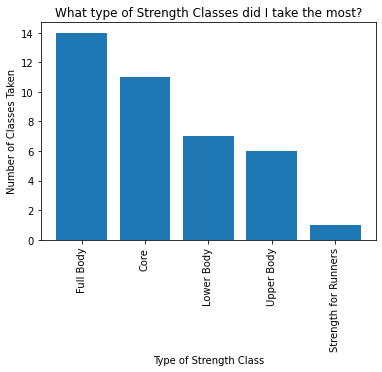

In [30]:
plt.bar(df_strength['Type'].value_counts().keys(),
       df_strength['Type'].value_counts().values)
plt.xlabel("Type of Strength Class")
plt.ylabel("Number of Classes Taken")
plt.title("What type of Strength Classes did I take the most?")
plt.xticks(rotation=90);

## Top Instructors for Running and Strength

In [31]:
df_running['Instructor Name'].value_counts()

Jess King          19
Becs Gentry         5
Rebecca Kennedy     3
Andy Speer          1
Susie Chan          1
Name: Instructor Name, dtype: int64

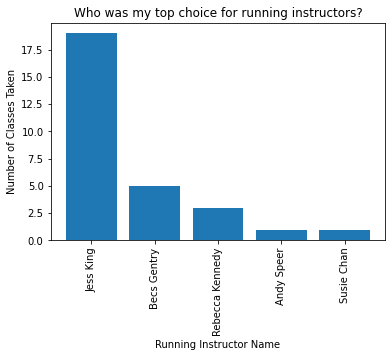

In [32]:
plt.bar(df_running['Instructor Name'].value_counts().keys(),
       df_running['Instructor Name'].value_counts().values)
plt.xlabel("Running Instructor Name")
plt.ylabel("Number of Classes Taken")
plt.title("Who was my top choice for running instructors?")
plt.xticks(rotation=90);

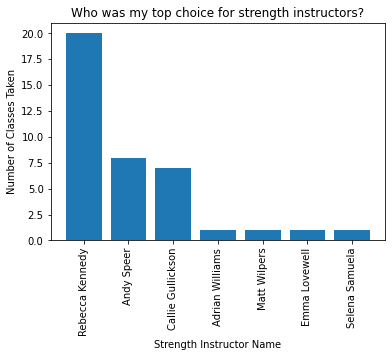

In [33]:
plt.bar(df_strength['Instructor Name'].value_counts().keys(),
       df_strength['Instructor Name'].value_counts().values)
plt.xlabel("Strength Instructor Name")
plt.ylabel("Number of Classes Taken")
plt.title("Who was my top choice for strength instructors?")
plt.xticks(rotation=90);

## Class Length

In [38]:
minutes_and_counts = {}
for minutes in df_peloton['Length (minutes)'].value_counts().keys():
    minutes_and_counts[str(minutes) + ' minutes'] = df_peloton['Length (minutes)'].value_counts()[minutes]

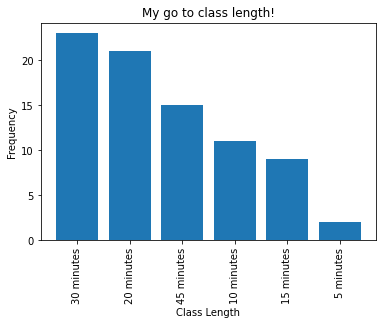

In [44]:
plt.bar(minutes_and_counts.keys(),
        minutes_and_counts.values())
plt.xlabel("Class Length")
plt.ylabel("Frequency")
plt.title("My go to class length!")
plt.xticks(rotation=90);

## Fitness Disciplines and Class Length

In [46]:
all_disciplines = list(df_peloton['Fitness Discipline'].unique())

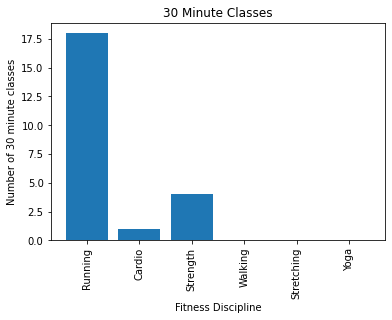

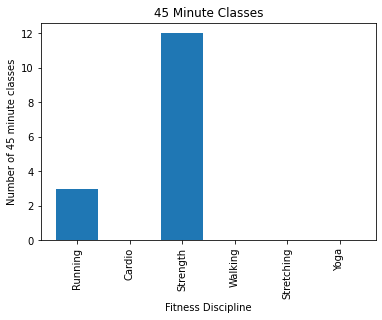

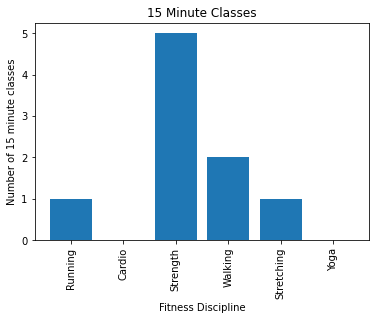

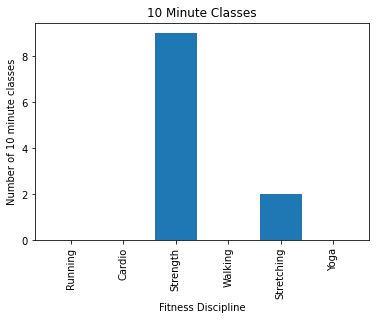

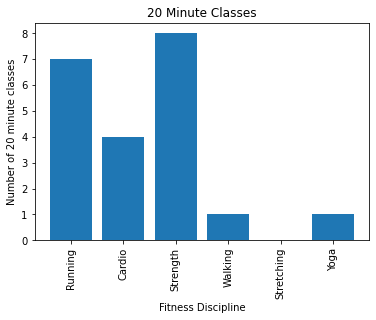

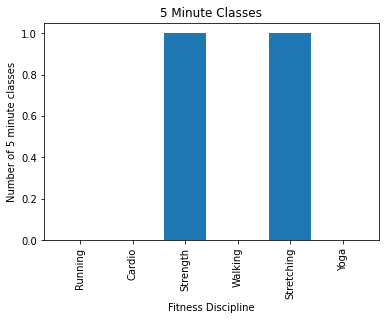

In [50]:
for mins in df_peloton['Length (minutes)'].unique():
    df_mins = df_peloton[df_peloton['Length (minutes)'] == mins] 
    
    plt.figure()
    
    discipline_and_counts = {}
    for disc in all_disciplines:
        if disc not in df_mins['Fitness Discipline'].value_counts().keys():
            discipline_and_counts[disc] = 0
            continue
        discipline_and_counts[disc] = df_mins['Fitness Discipline'].value_counts()[disc]
        
    plt.bar(discipline_and_counts.keys(),
           discipline_and_counts.values())
    plt.xlabel("Fitness Discipline")
    plt.ylabel("Number of {} minute classes".format(mins))
    plt.title("{} Minute Classes".format(mins))
    plt.xticks(rotation=90);

## Class Type and Class Length

In [51]:
all_types = list(df_peloton['Type'].unique())

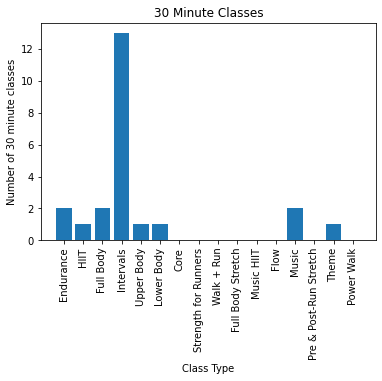

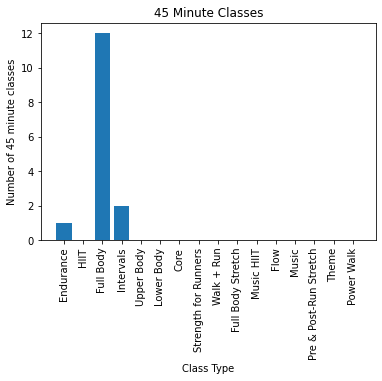

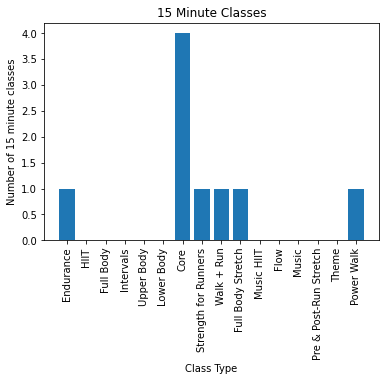

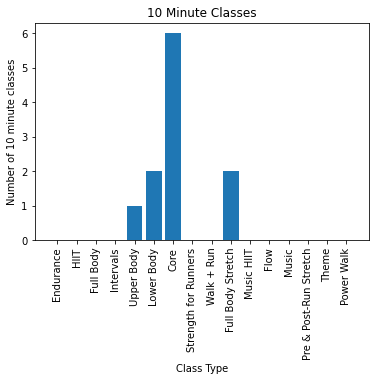

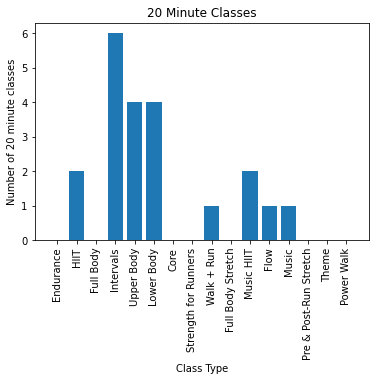

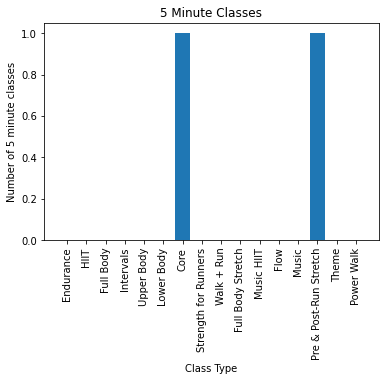

In [53]:
for mins in df_peloton['Length (minutes)'].unique():
    df_mins = df_peloton[df_peloton['Length (minutes)'] == mins] 
    
    plt.figure()
    
    types_and_counts = {}
    for type_ in all_types:
        if type_ not in df_mins['Type'].value_counts().keys():
            types_and_counts[type_] = 0
            continue
        types_and_counts[type_] = df_mins['Type'].value_counts()[type_]
        
    plt.bar(types_and_counts.keys(),
           types_and_counts.values())
    plt.xlabel("Class Type")
    plt.ylabel("Number of {} minute classes".format(mins))
    plt.title("{} Minute Classes".format(mins))
    plt.xticks(rotation=90);

## Workout Timestamp

In [78]:
for i in df_peloton.index:
    df_peloton.loc[i, 'Workout Timestamp'] = df_peloton.loc[i]['Workout Timestamp'].replace(' (CDT)', '')
    df_peloton.loc[i, 'Workout Timestamp'] = df_peloton.loc[i]['Workout Timestamp'].replace(' (PDT)', '')

In [80]:
df_peloton['Workout Timestamp'] = pd.to_datetime(df_peloton['Workout Timestamp'])

In [81]:
df_peloton

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Class Timestamp,Total Output,Avg. Watts,Avg. Resistance,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Calories Burned,Avg. Heartrate,Avg. Incline,Avg. Pace (min/mi)
0,2022-03-07 17:41:00,On Demand,Becs Gentry,30,Running,Endurance,30 min 5K Race Prep,2019-07-11 11:34 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,174,NaN,NaN,NaN
1,2022-03-08 17:53:00,On Demand,Callie Gullickson,30,Cardio,HIIT,30 min HIIT Cardio,2022-02-23 08:50 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,166,NaN,NaN,NaN
2,2022-03-10 09:13:00,On Demand,Rebecca Kennedy,45,Strength,Full Body,45 min Full Body Strength,2022-01-28 08:51 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,228,NaN,NaN,NaN
3,2022-03-11 15:34:00,On Demand,Becs Gentry,30,Running,Intervals,30 min Intervals Run,2020-01-31 08:54 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,253,NaN,NaN,NaN
4,2022-03-12 16:56:00,On Demand,Rebecca Kennedy,45,Strength,Full Body,45 min Full Body Strength,2022-01-28 08:51 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,210,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2022-05-03 17:39:00,On Demand,Andy Speer,20,Strength,Upper Body,20 min Arms & Shoulders Strength,2022-04-12 08:52 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,NaN
77,2022-05-06 17:01:00,On Demand,Jess King,30,Running,Music,30 min Pop Run,2021-05-21 08:00 (PDT),NaN,NaN,NaN,NaN,NaN,NaN,253,NaN,NaN,NaN
78,2022-05-17 18:08:00,On Demand,Callie Gullickson,30,Strength,Full Body,30 min Full Body Strength,2022-05-14 05:52 (PDT),NaN,NaN,NaN,NaN,NaN,NaN,158,NaN,NaN,NaN
79,2022-06-20 16:06:00,On Demand,Susie Chan,30,Running,Endurance,30 min Endurance Run,2022-06-01 12:25 (CDT),NaN,NaN,NaN,NaN,NaN,NaN,305,NaN,NaN,NaN


In [84]:
df_peloton['Workout Month-Year'] = ""
for i in df_peloton.index:
    df_peloton.loc[i, 'Workout Month-Year'] = df_peloton.loc[i, 'Workout Timestamp'].strftime("%B") + '-' + df_peloton.loc[i, 'Workout Timestamp'].strftime("%Y")

## Number of Workouts on a given Day

In [92]:
df_peloton['Workout Date'] = ""
for i in df_peloton.index:
    df_peloton.loc[i, 'Workout Date'] = df_peloton.loc[i]['Workout Timestamp'].date()

In [96]:
df_peloton.sort_values(by='Workout Date', inplace=True)

In [116]:
min_date = min(df_peloton['Workout Date'])
max_date = max(df_peloton['Workout Date'])

date_wkout_counts = {}

In [117]:
date = min_date
while date <= max_date:
    
    if date not in df_peloton['Workout Date'].value_counts().sort_index().keys():
        date_wkout_counts[date] = 0
        date = date + datetime.timedelta(days=1)
        continue
        
    date_wkout_counts[date] = df_peloton['Workout Date'].value_counts().sort_index()[date]
    
    date = date + datetime.timedelta(days=1)

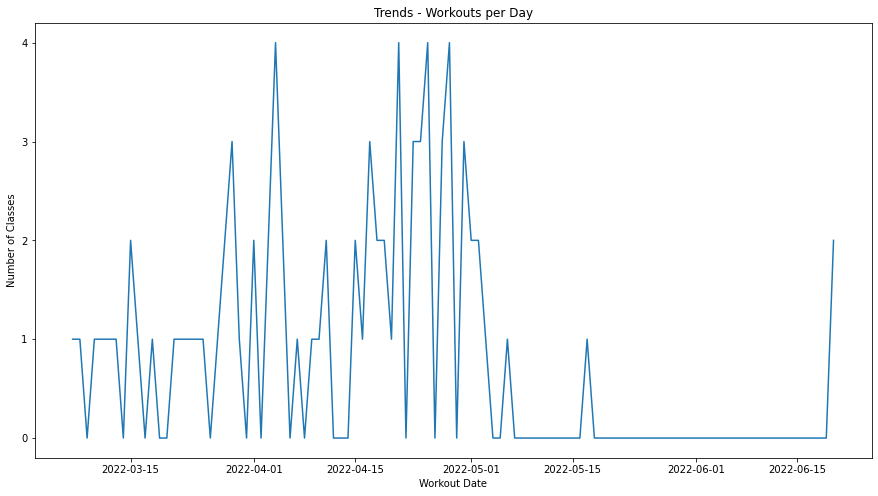

In [124]:
plt.figure(figsize=(15,8))
plt.plot(date_wkout_counts.keys(),
        date_wkout_counts.values())
plt.xlabel("Workout Date")
plt.ylabel("Number of Classes")
plt.title("Trends - Workouts per Day")
# plt.xticks(list(date_wkout_counts.keys()),
#           rotation=90);
plt.yticks(range(0,5));

## Trends in Calories Burned
Across all workouts

In [125]:
df_peloton

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Class Timestamp,Total Output,Avg. Watts,...,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Calories Burned,Avg. Heartrate,Avg. Incline,Avg. Pace (min/mi),Workout Month,Workout Month-Year,Workout Date
0,2022-03-07 17:41:00,On Demand,Becs Gentry,30,Running,Endurance,30 min 5K Race Prep,2019-07-11 11:34 (CDT),NaN,NaN,...,NaN,NaN,NaN,174,NaN,NaN,NaN,March,March-2022,2022-03-07
1,2022-03-08 17:53:00,On Demand,Callie Gullickson,30,Cardio,HIIT,30 min HIIT Cardio,2022-02-23 08:50 (CDT),NaN,NaN,...,NaN,NaN,NaN,166,NaN,NaN,NaN,March,March-2022,2022-03-08
2,2022-03-10 09:13:00,On Demand,Rebecca Kennedy,45,Strength,Full Body,45 min Full Body Strength,2022-01-28 08:51 (CDT),NaN,NaN,...,NaN,NaN,NaN,228,NaN,NaN,NaN,March,March-2022,2022-03-10
3,2022-03-11 15:34:00,On Demand,Becs Gentry,30,Running,Intervals,30 min Intervals Run,2020-01-31 08:54 (CDT),NaN,NaN,...,NaN,NaN,NaN,253,NaN,NaN,NaN,March,March-2022,2022-03-11
4,2022-03-12 16:56:00,On Demand,Rebecca Kennedy,45,Strength,Full Body,45 min Full Body Strength,2022-01-28 08:51 (CDT),NaN,NaN,...,NaN,NaN,NaN,210,NaN,NaN,NaN,March,March-2022,2022-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2022-05-03 17:39:00,On Demand,Andy Speer,20,Strength,Upper Body,20 min Arms & Shoulders Strength,2022-04-12 08:52 (CDT),NaN,NaN,...,NaN,NaN,NaN,57,NaN,NaN,NaN,May,May-2022,2022-05-03
77,2022-05-06 17:01:00,On Demand,Jess King,30,Running,Music,30 min Pop Run,2021-05-21 08:00 (PDT),NaN,NaN,...,NaN,NaN,NaN,253,NaN,NaN,NaN,May,May-2022,2022-05-06
78,2022-05-17 18:08:00,On Demand,Callie Gullickson,30,Strength,Full Body,30 min Full Body Strength,2022-05-14 05:52 (PDT),NaN,NaN,...,NaN,NaN,NaN,158,NaN,NaN,NaN,May,May-2022,2022-05-17
79,2022-06-20 16:06:00,On Demand,Susie Chan,30,Running,Endurance,30 min Endurance Run,2022-06-01 12:25 (CDT),NaN,NaN,...,NaN,NaN,NaN,305,NaN,NaN,NaN,June,June-2022,2022-06-20


In [127]:
df_calories_daily = df_peloton.groupby("Workout Date").sum().reset_index()

In [129]:
df_calories_daily[['Workout Date', 'Calories Burned']].head()

,Workout Date,Calories Burned
0,2022-03-07,174
1,2022-03-08,166
2,2022-03-10,228
3,2022-03-11,253
4,2022-03-12,210


In [146]:
min_date = min(df_calories_daily['Workout Date'])
max_date = max(df_calories_daily['Workout Date'])

wkout_and_calories = {}
date = min_date

while date <= max_date:
    if date not in df_calories_daily['Workout Date'].values:
        wkout_and_calories[date] = 0
        date = date + datetime.timedelta(days=1)
        continue
    wkout_and_calories[date] = df_calories_daily[df_calories_daily['Workout Date'] == date]['Calories Burned'].values[0]
    date = date + datetime.timedelta(days=1)

In [147]:
min_date in df_calories_daily['Workout Date']

False

Text(0.5, 1.0, 'Trends - Calories Burned per Day')

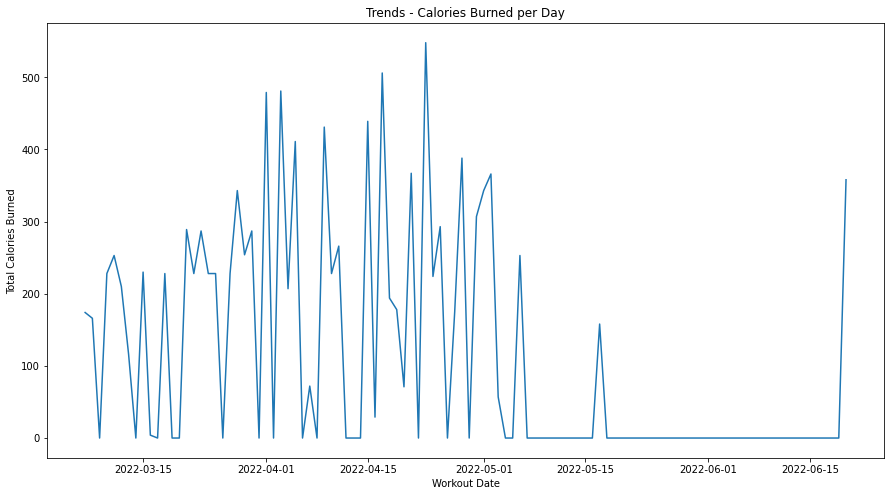

In [151]:
plt.figure(figsize=(15,8))
plt.plot(wkout_and_calories.keys(),
        wkout_and_calories.values())
plt.xlabel("Workout Date")
plt.ylabel("Total Calories Burned")
plt.title("Trends - Calories Burned per Day")
# plt.xticks(list(date_wkout_counts.keys()),
#           rotation=90);
#plt.yticks(range(0,5));

## Calories Burned - Running

In [153]:
df_running = df_peloton[df_peloton['Fitness Discipline'] == 'Running']

In [156]:
df_running_calories = df_running.groupby("Workout Date").sum().reset_index()

In [158]:
df_running_calories[['Workout Date', 'Calories Burned']].head()

,Workout Date,Calories Burned
0,2022-03-07,174
1,2022-03-11,253
2,2022-03-13,116
3,2022-03-16,4
4,2022-03-21,289


In [161]:
min_date = min(df_running_calories['Workout Date'])
max_date = max(df_running_calories['Workout Date'])

running_and_calories = {}
date = min_date

while date <= max_date:
    if date not in df_running_calories['Workout Date'].values:
        running_and_calories[date] = 0
        date = date + datetime.timedelta(days=1)
        continue
    running_and_calories[date] = df_running_calories[df_running_calories['Workout Date'] == date]['Calories Burned'].values[0]
    date = date + datetime.timedelta(days=1)

Text(0.5, 1.0, 'Trends - Calories Burned per Day with Running')

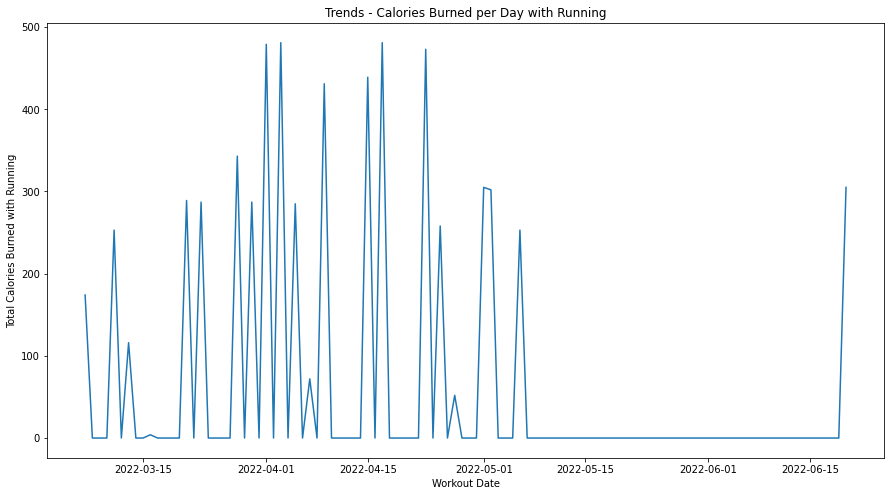

In [163]:
plt.figure(figsize=(15,8))
plt.plot(running_and_calories.keys(),
        running_and_calories.values())
plt.xlabel("Workout Date")
plt.ylabel("Total Calories Burned with Running")
plt.title("Trends - Calories Burned per Day with Running")
# plt.xticks(list(date_wkout_counts.keys()),
#           rotation=90);
#plt.yticks(range(0,5));

## Calories Burned - Strength

In [164]:
df_strength = df_peloton[df_peloton['Fitness Discipline'] == 'Strength']

In [165]:
df_strength_calories = df_strength.groupby("Workout Date").sum().reset_index()

In [166]:
df_strength_calories[['Workout Date', 'Calories Burned']].head()

,Workout Date,Calories Burned
0,2022-03-10,228
1,2022-03-12,210
2,2022-03-15,230
3,2022-03-18,228
4,2022-03-22,228


In [167]:
min_date = min(df_strength_calories['Workout Date'])
max_date = max(df_strength_calories['Workout Date'])

strength_and_calories = {}
date = min_date

while date <= max_date:
    if date not in df_strength_calories['Workout Date'].values:
        strength_and_calories[date] = 0
        date = date + datetime.timedelta(days=1)
        continue
    strength_and_calories[date] = df_strength_calories[df_strength_calories['Workout Date'] == date]['Calories Burned'].values[0]
    date = date + datetime.timedelta(days=1)

Text(0.5, 1.0, 'Trends - Calories Burned per Day with Strength')

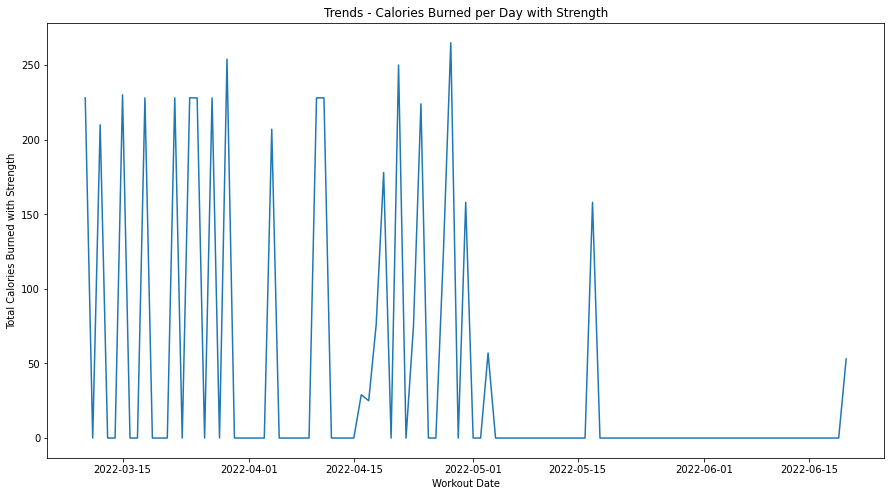

In [169]:
plt.figure(figsize=(15,8))
plt.plot(strength_and_calories.keys(),
        strength_and_calories.values())
plt.xlabel("Workout Date")
plt.ylabel("Total Calories Burned with Strength")
plt.title("Trends - Calories Burned per Day with Strength")
# plt.xticks(list(date_wkout_counts.keys()),
#           rotation=90);
#plt.yticks(range(0,5));